Attributes:

1. BMI - (UW, NW, OW, OB)
    Underweight: BMI less than 18.5
    Normal weight: BMI between 18.5 and 24.9
    Overweight: BMI between 25 and 29.9
    Obese: BMI 30 or greater
2. Avg_hours_of_sleep - (1-10)

3. No._of_Friends - (0-6) --> 6 friends indicates he/She can have more than 6 friends also

4. Character_type - (0,1)
    0-Introvert
    1-Extrovert
5. Academic_score - (0-100)

6. Stressed -(0,1)
    0-Student_not_stressed
    1-Student_stressed

In [1]:
import random as rd
sleep = rd.choices(list(range(2,12)),k=100)
frnds = rd.choices(list(range(0,7)),k=100)

In [2]:
data = {"sleep_hours":sleep,
       "friends":frnds}

In [3]:
df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

In [4]:
df.sleep_hours.value_counts()

4     16
3     15
11    12
6     11
8     10
7     10
5      9
10     7
2      6
9      4
Name: sleep_hours, dtype: int64

In [5]:
df.friends.value_counts()

5    18
4    16
0    16
1    15
6    13
3    12
2    10
Name: friends, dtype: int64

In [6]:
character = []
for i in df.friends:
    if i>3:
        character.append(0)
    else:
        character.append(1)

In [7]:
df['Nature'] = character

In [8]:
df.Nature.value_counts()

1    53
0    47
Name: Nature, dtype: int64

In [9]:
df

,sleep_hours,friends,Nature
0,11,6,0
1,4,1,1
2,11,6,0
3,5,6,0
4,4,3,1
...,...,...,...
95,10,0,1
96,11,5,0
97,11,5,0
98,3,1,1


In [10]:
bmi = rd.choices([12+ rd.random()*5,19 + rd.random()*5,25 + rd.random()*5,30 + rd.random()*5],k = 100)


In [11]:
df['BMI'] = bmi

In [12]:
score = rd.choices(range(35,100),k=100)


In [13]:
df['Academic_score'] = score

In [14]:
stress = []
for i in range(0,100):
    if df.friends.iloc[i]<3 and df.Academic_score.iloc[i]<75 and df.BMI.iloc[i]>30:
        stress.append(1)
    elif df.Nature.iloc[i] == 1 and df.Academic_score.iloc[i]>60 and 18 < df.BMI.iloc[i] <24:
        stress.append(0)
    elif df.sleep_hours.iloc[i]<5:
        stress.append(1)
    else: stress.append(0)


In [15]:
df['stress'] = stress

In [16]:
df

,sleep_hours,friends,Nature,BMI,Academic_score,stress
0,11,6,0,15.366272,83,0
1,4,1,1,30.721986,92,1
2,11,6,0,27.157230,69,0
3,5,6,0,15.366272,91,0
4,4,3,1,15.366272,76,1
...,...,...,...,...,...,...
95,10,0,1,30.721986,46,1
96,11,5,0,22.291169,36,0
97,11,5,0,30.721986,97,0
98,3,1,1,30.721986,71,1


In [17]:
df.to_csv("Student_stress.csv")

In [18]:
#loading Data set
df1 = pd.read_csv("Student_stress.csv",index_col = 0) 

<IPython.core.display.Javascript object>

In [19]:
df1

,sleep_hours,friends,Nature,BMI,Academic_score,stress
0,11,6,0,15.366272,83,0
1,4,1,1,30.721986,92,1
2,11,6,0,27.157230,69,0
3,5,6,0,15.366272,91,0
4,4,3,1,15.366272,76,1
...,...,...,...,...,...,...
95,10,0,1,30.721986,46,1
96,11,5,0,22.291169,36,0
97,11,5,0,30.721986,97,0
98,3,1,1,30.721986,71,1


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sleep_hours     100 non-null    int64  
 1   friends         100 non-null    int64  
 2   Nature          100 non-null    int64  
 3   BMI             100 non-null    float64
 4   Academic_score  100 non-null    int64  
 5   stress          100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 5.5 KB


In [29]:
df1.describe()

,sleep_hours,friends,Nature,BMI,Academic_score,stress
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,6.200000,3.03000,0.530000,24.279070,67.490000,0.360000
std,2.839121,2.05704,0.501614,5.464780,19.816071,0.482418
min,2.000000,0.00000,0.000000,15.366272,35.000000,0.000000
25%,4.000000,1.00000,0.000000,22.291169,48.000000,0.000000
50%,6.000000,3.00000,1.000000,27.157230,70.500000,0.000000
75%,8.000000,5.00000,1.000000,28.048419,84.250000,1.000000
max,11.000000,6.00000,1.000000,30.721986,98.000000,1.000000


In [31]:
x = df1.drop('stress',axis = 1)
y = df1.stress

0     0
1     1
2     0
3     0
4     1
     ..
95    1
96    0
97    0
98    1
99    0
Name: stress, Length: 100, dtype: int64

In [21]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

<AxesSubplot:>

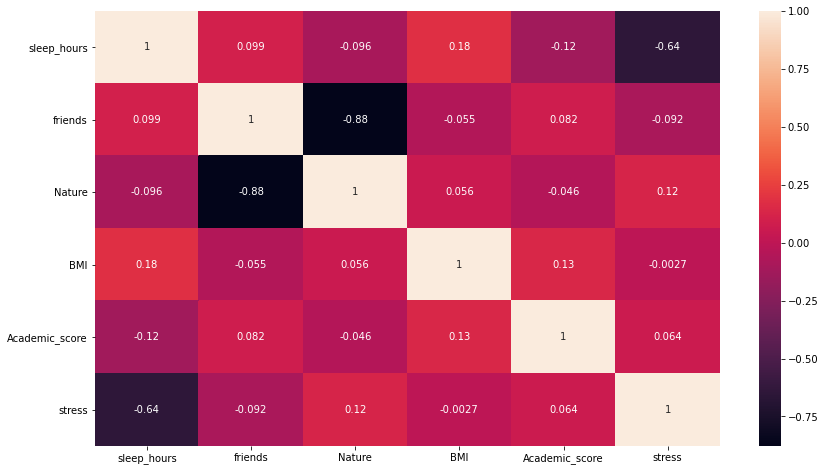

In [27]:
plt.figure(figsize = (14,8))
sns.heatmap(df1.corr(),annot = True)

In [34]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y)

In [35]:
from sklearn.svm import SVC
svc = SVC()

In [36]:
svc.fit(trainx,trainy)

SVC()

In [37]:
y_pred = svc.predict(testx)

<AxesSubplot:>

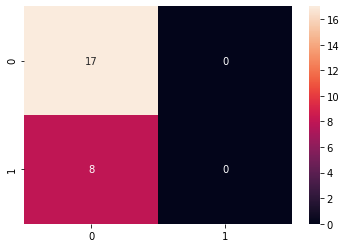

In [41]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
sns.heatmap(confusion_matrix(testy,y_pred),annot = True)

In [43]:
print(classification_report(testy,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
accuracy_score(testy,y_pred)

0.68